# TP1 : Analyse des series temporelles 




L'étude de la consommation électrique en France est un sujet qui est toujours d'actualité. 

Sur le site OPEN DATA/Réseaux énergie (https://opendata.reseaux-energies.fr/explore/?sort=modified), il s'y trouve de très intéressantes séries temporelles.

Nous avons téléchargé le fichier qui donne la consommation de gaz et d'électricité de 2012 à 2019 en France.

https://opendata.reseaux-energies.fr/explore/dataset/consommation-quotidienne-brute/information/?sort=-date_heure

Afin d'illustrer les notions introduites en cours, nous allons étudier ce fichier (il est stocké sur moodle  dans le fichier zippé Data TP1.

## L'objectif pour ce tp est de :

- Comprendre et appliquer une méthode d'analyse d'une série chronologique
- Comprendre une série chronologique
- Décrire la série chronologique
- Visualiser et Analyser une série chronologique
- Décomposition de la série chronologique (tendance, saisonnalité, erreur)

## La structure de TP :

- Importation de la série
- Description de la série
- Visualisation de la série
- Décomposition de la série
- Modélisation de la tendance
- Etude du bruit




Lors de ce TP, nous allons utiliser les librairie pandas, numpy, matplotlib et dateutil.parser (en python).

Il faut compléter (si nécessaire) le code puis l'exécuter, des commentaires vous sont demandés.

A l'issu du TP, vous sauvegardez le notebook sous le nom TP1_nom1_prenom1_nom2_prenom2_n°_groupe.ipynb.

Vous le sauvegarderez en local sur votre compte, vous le compresserez puis vous le déposerez sur le dépot moodle correspondant.


# Importatation des librairies python

- pandas (outil d'analyse et de manipulation de données open source)
    - https://pandas.pydata.org
    - le module Series contient des éléments de traitement d'une série temporelle
    
- matplotlib (bibliothèque complète pour créer des visualisations statiques, animées et interactives)
    - https://matplotlib.org
    - affichage des séries
    
- dateutil (extensions au module datetime standard)
    - https://dateutil.readthedocs.io/en/stable/
    
- numpy (outil pour le calcul scientifque)
    - https://numpy.org
    
- statsmodels (classes et fonctions pour l'estimation de nombreux modèles statistiques différents, ainsi que pour la réalisation de tests statistiques et l'exploration de données statistique)
    - module analyse series temporelles
    - https://www.statsmodels.org/stable/api.html#time-series-tools



In [1]:
# librairies python importée pour ce tp
import dateutil.parser # conversion date - string - année
from dateutil.parser import parse 
import pandas as pd  # panda (dataframe,...)
import numpy as np
import matplotlib.pyplot as plt # affichage de type matlab

from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters

from pandas import Series

from statsmodels.tsa.seasonal import seasonal_decompose


# Importation et Lecture des données

La 1ère étape consiste à importer le contenu du fichier 'consommation-quotidienne-brute_tr1.csv' et à l'étudier.

- Importer le contenu du fichier dans un DataFrame par le biais "read_csv" (librairie pandas).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

Le séparateur de champ dans le fichier "csv" est le ';'. Les dates et les horaires sont contenues dans deux colonnes qu'il ne faudra pas oublier de parser. 

- Compléter la fonction read_csv (separateur, parser les dates)
- Afficher les premières lignes du DataFrame à l'aide de la fonction "print()".
- Commenter

In [85]:
# lecture d'un fichier csv 
# le séparateur est un ';' fonction "sep=';'"
# la fonction "parse_dates=['nom de la colonne']" permet de parser une date 
#                                  (format string vers format date)
# Attention au chemin menant au fichier

dfb = pd.read_csv('/homes/x21zhang/Documents/DSTIA/donnees_TP1/consommation-quotidienne-brute_tr5.csv',sep=';',parse_dates=['Date - Heure','Date'])
print(dfb)
# remplace la ligne précédente et à compléter
# dfb = pd.read_csv('consommation-quotidienne-brute_tr1.csv',sep='à completer ',parse_dates=[??])

# affichage du data frame
# print(???)

# compléter les variables sep='?',parse_dates=['?','?'] dans la fonction "read_csv".

                     Date - Heure       Date  Heure  \
0       2021-11-30 23:30:00+01:00 2021-11-30  23:30   
1       2021-11-30 23:00:00+01:00 2021-11-30  23:00   
2       2021-11-30 22:30:00+01:00 2021-11-30  22:30   
3       2021-11-30 22:00:00+01:00 2021-11-30  22:00   
4       2021-11-30 21:30:00+01:00 2021-11-30  21:30   
...                           ...        ...    ...   
173851  2012-01-01 02:00:00+01:00 2012-01-01  02:00   
173852  2012-01-01 01:30:00+01:00 2012-01-01  01:30   
173853  2012-01-01 01:00:00+01:00 2012-01-01  01:00   
173854  2012-01-01 00:30:00+01:00 2012-01-01  00:30   
173855  2012-01-01 00:00:00+01:00 2012-01-01  00:00   

        Consommation brute gaz totale (MW PCS 0°C)  \
0                                              NaN   
1                                          76476.0   
2                                              NaN   
3                                          82475.0   
4                                              NaN   
...            

Une fois bien lu le fichier csv, on peut visualiser la série.

- Afficher la série temporelle puis expliquer le résultat

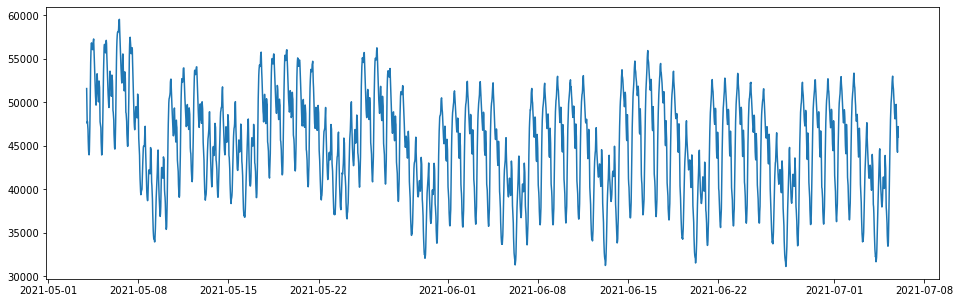

In [86]:
# Plot des données
# Afficher la série temporellle 
plt.figure(figsize=(16,5))
plt.plot(dfb[7104:10128][['Date - Heure']],\
         dfb[7104:10128][['Consommation brute électricité (MW) - RTE']])

- Refaire le même exercice avec le fichier consommation-quotidienne-brute_tr5.csv

In [87]:
dfb1 = pd.read_csv('/homes/x21zhang/Documents/DSTIA/donnees_TP1/consommation-quotidienne-brute_tr1.csv',sep=';',parse_dates=['Date - Heure','Date'])
print(dfb1)

                     Date - Heure       Date  \
0       2012-01-01 15:00:00+01:00 2012-01-01   
1       2012-01-01 00:00:00+01:00 2012-01-01   
2       2012-01-01 21:00:00+01:00 2012-01-01   
3       2012-01-01 19:30:00+01:00 2012-01-01   
4       2012-01-01 09:30:00+01:00 2012-01-01   
...                           ...        ...   
131419  2019-06-02 07:30:00+02:00 2019-02-06   
131420  2019-06-02 11:30:00+02:00 2019-02-06   
131421  2019-06-02 14:00:00+02:00 2019-02-06   
131422  2019-06-02 14:30:00+02:00 2019-02-06   
131423  2019-06-02 15:00:00+02:00 2019-02-06   

        Consommation brute gaz (MW PCS 0°C) - GRTgaz  \
0                                            57452.0   
1                                            52099.0   
2                                            55249.0   
3                                                NaN   
4                                                NaN   
...                                              ...   
131419                         

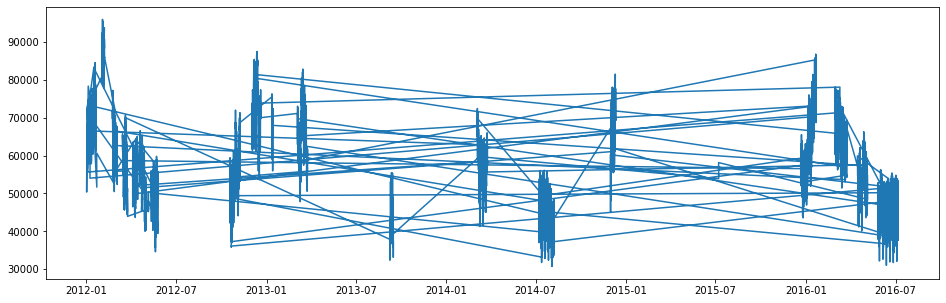

In [88]:
plt.figure(figsize=(16,5))
plt.plot(dfb1[7104:10128][['Date - Heure']],\
         dfb1[7104:10128][['Consommation brute électricité (MW) - RTE']])

# Création de stat. descriptives permettant de décrire le fichier et les données qui le compose.

L'objectif est de décrire le contenu des données qui ont été importées c'est-à-dire connaître le nombre et le nom des variables (et ce que cela représente).

On commencera par la lecture des informations du dataframe. 


- Afficher les paramètres 'dtypes' et 'info' du dataframe afin de connaître les noms et le type de chaque colonnes, d'avoir un aperçu des premières lignes. 


https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


# Description des données

In [4]:
print( dfb.dtypes)
print( dfb.info)

Date - Heure                                          object
Date                                          datetime64[ns]
Heure                                                 object
Consommation brute gaz totale (MW PCS 0°C)           float64
Consommation brute électricité (MW) - RTE              int64
Consommation brute totale (MW)                       float64
dtype: object
<bound method DataFrame.info of                      Date - Heure       Date  Heure  \
0       2021-11-30 23:30:00+01:00 2021-11-30  23:30   
1       2021-11-30 23:00:00+01:00 2021-11-30  23:00   
2       2021-11-30 22:30:00+01:00 2021-11-30  22:30   
3       2021-11-30 22:00:00+01:00 2021-11-30  22:00   
4       2021-11-30 21:30:00+01:00 2021-11-30  21:30   
...                           ...        ...    ...   
173851  2012-01-01 02:00:00+01:00 2012-01-01  02:00   
173852  2012-01-01 01:30:00+01:00 2012-01-01  01:30   
173853  2012-01-01 01:00:00+01:00 2012-01-01  01:00   
173854  2012-01-01 00:30:00+01:00 2012

- Indiquer les noms et les type de chaque colonne, la dimension des données


# Statistique descriptive

Dans le dataframe, on a remarquer la présence de variable de type float. 

- Calculer à l'aide de la commande 'describe()' appliquée au dataframe 'dfb'  un certain nombre de paramètres.



In [92]:
#dfb. # décommenter et compléter
dfb.describe()

,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Consommation brute totale (MW)
count,86927.000000,173856.000000,86927.000000
mean,53430.811762,53875.668329,107305.280097
std,29027.650006,11996.868659,40124.217805
min,3670.000000,28738.000000,45476.000000
25%,28167.500000,44754.000000,74164.500000
50%,45599.000000,52204.500000,96107.000000
75%,75313.000000,61987.000000,137019.000000
max,176040.000000,101866.000000,274815.000000


- Préciser ce que peut contenir une analyse descriptive
- Lister les paramètres calculés
- Commenter les résultats obtenus

# Tranformation des données




On se concentrera sur la colonne 'Consommation brute électricité (MW) - RTE'.
- Créer une data frame ne contenant que les colonnes 'Date - Heure' et 'Consommation brute électricité (MW) - RTE' que l'on nommera dftr.

- Trier les données par date.

- Afin de savoir si la série temporelle est à pas constant, on effectuera la différence entre 2 indices temporelles successifs et on étudiera s'il existe une variation

In [6]:
dft = dfb.sort_values(by='Date - Heure') 
# c'est ici que l'on voit l'importance de parser la date

dftr = dft[['Date - Heure','Consommation brute électricité (MW) - RTE']]

# créer le dataframe resultant de la différence de 2 valeurs successives
dftdiff = dftr.diff()

In [7]:
# trier dftdiff par 'Date - Heure'
# dftdiff.???_values(by='Date - Heure')
dftdiff = dftdiff.sort_values(by='Date - Heure')

In [8]:
dftdiff = dftdiff.assign(d=dfb[['Date - Heure']])

# afficher le résultat et il sera peut être nécesseraire de retrier la colonne 'Date - Heure' afin d'avoir un classement par variation
print(dftdiff)

       Date - Heure  Consommation brute électricité (MW) - RTE  \
117065      0:00:00                                      752.0   
169817      0:00:00                                      813.0   
169818      0:00:00                                        0.0   
82123       0:00:00                                        0.0   
82121       0:00:00                                      733.0   
...             ...                                        ...   
54235       1:30:00                                     -799.0   
89179       1:30:00                                     -810.0   
36763       1:30:00                                     -716.0   
1483        1:30:00                                     -600.0   
173855          NaN                                        NaN   

                                d  
117065  2015-03-29 03:30:00+02:00  
169817  2012-03-25 03:30:00+02:00  
169818  2012-03-25 03:00:00+02:00  
82123   2017-03-26 03:00:00+02:00  
82121   2017-03-26 03:30:00

- Peut-on expliquer que des variations temporelles d'une durée de 0:00 et de 1:30 apparaissent ?


# Visualisation des données

- Problème de la visualisation des informations recherché (selon l'échelle notre perception n'est pas la même)

- 1er essai de visualisation.

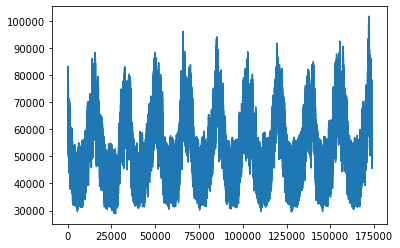

In [9]:
plt.plot(dfb[['Consommation brute électricité (MW) - RTE']])

Ce résultat semble faux. Quelle est l'erreur ? 

In [10]:
# Définition d'une fonction affichage, permet d'indiquer les différents label, et un titre
def plot_df(df, x, y, title="??", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


Après avoir créer une fonction plot_df (permet de définir quelques paramètres annexes par défaut), faites quelqies essais.

- En utilisant la fonction précédente, afficher la consommation élecrtique entre :
  - 01/01/2012 - 30/06/2019 (plusieurs années)
  - 28/05/2012 - 29/07/2012 (5-6 semaines)
  - 28/05/2012 - 3/06/2012 (1 semaine)
  
- Observer ces 3 courbes et commenter 

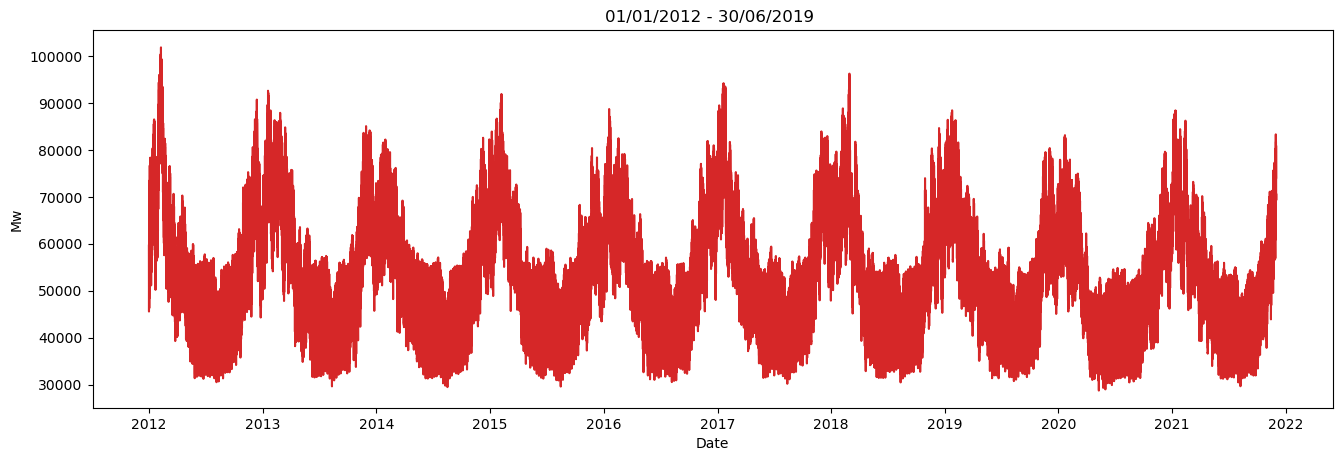

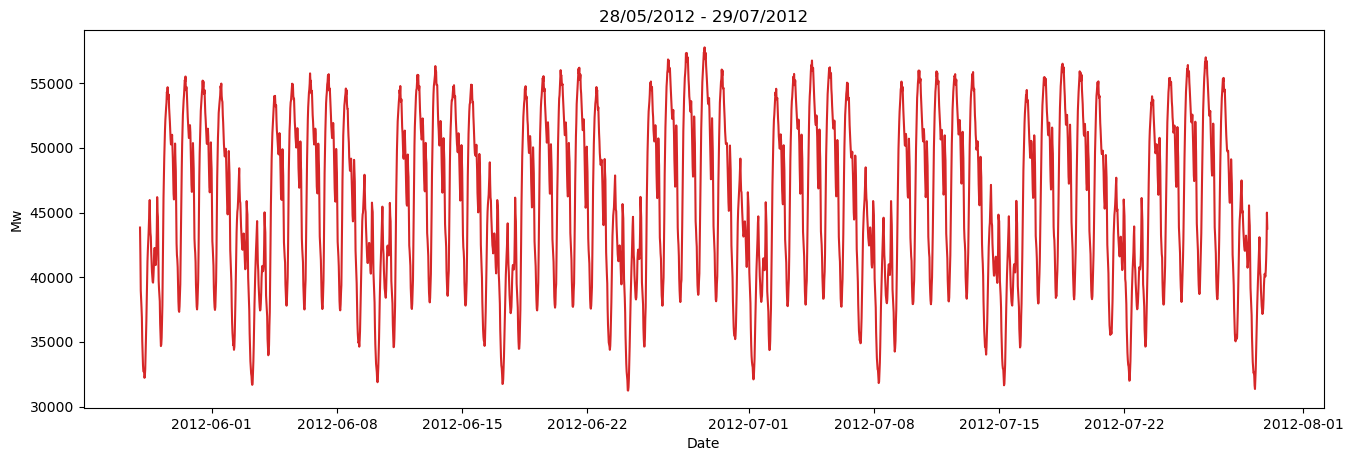

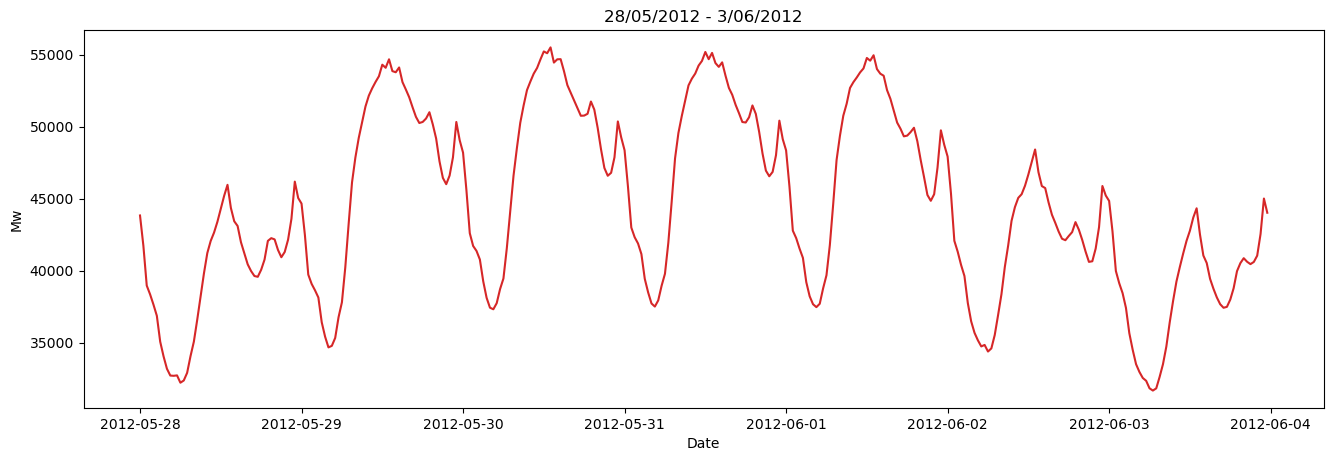

In [11]:
# plot_df(dft, x=dft[['Date - Heure'], y = dft['Nom de la colonne']] à compléter
# plot_df(dft, x=dft[7104:10128][['Date - Heure'] à compléter
# plot_df(dft, x=dft[7104:7440][['Date - Heure'] à comlpéter
plot_df(dft, x=dft['Date - Heure'], y = dft['Consommation brute électricité (MW) - RTE'],title = "01/01/2012 - 30/06/2019 ",ylabel="Mw")
plot_df(dft, x=dft[7104:10128]['Date - Heure'],y = dft[7104:10128]['Consommation brute électricité (MW) - RTE'],title = "28/05/2012 - 29/07/2012",ylabel="Mw")
plot_df(dft, x=dft[7104:7440]['Date - Heure'],y = dft[7104:7440]['Consommation brute électricité (MW) - RTE'],title = "28/05/2012 - 3/06/2012",ylabel="Mw")

- Creer trois nouvelles séries permettant d'afficher les variations journamlière, mensuelle et annuelles de la consommmation électrique.

- Pour cela on vérifie que 'Date - Heure' est au format date et non string
- on applique une resample('D') (resp. 'M', 'Y') à la serie suivi d'une fonction 'sum()'
- Affichez les 3 séries et commenter (pour la série mensuelle, vous n'afficherez qu'un intervalle de 1 an)

<ipython-input-94-0d83a1dec8e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftr['Date - Heure'] = pd.to_datetime(dftr['Date - Heure'],utc=True)
/usr/lib/python3/dist-packages/pandas/core/arrays/datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


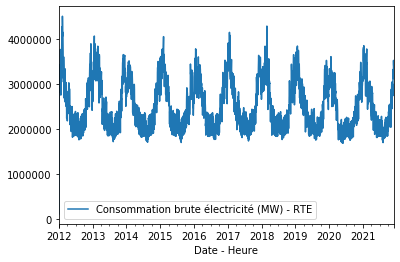

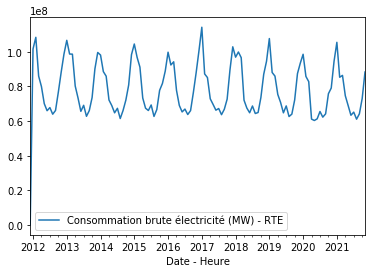

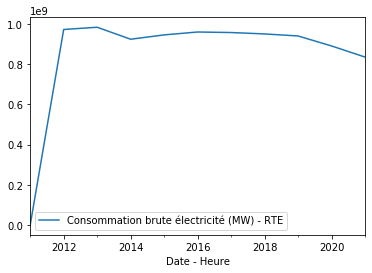

In [94]:
dftr['Date - Heure'] = pd.to_datetime(dftr['Date - Heure'],utc=True)
dftr.index = dftr['Date - Heure']

# serie quotidienne
#dftd = dftr.resample('???').sum() à compléter

dftd = dftr.resample('D').sum()
dftd.plot()
# série mensuelle
#dftm = dftr. à compléter

dftm = dftr.resample('M').sum()
dftm.plot()

# série annuelle
# dfty = dftr. à compléter

dfty = dftr.resample('Y').sum()
dfty.plot()

## Nous allons  étudier la série quotidienne (dftd) puis la série mensuelle (dftm)

- On va comparer d'une année à l'autre les variations quotidiennes d'une année à l'autre, puis les variations mensuelles 'autre part.



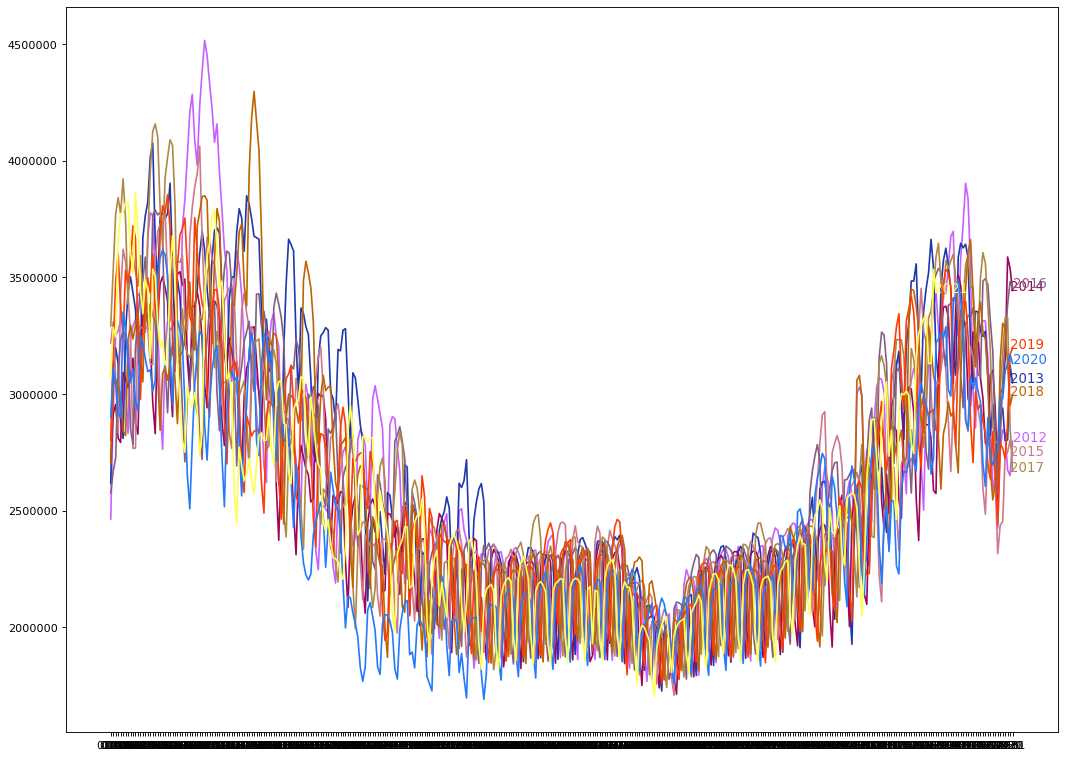

In [13]:
# Import Data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
#df.reset_index(inplace=True)
#dft2 = dft.copy()
# Prepare data
#dft2.insert('year')
#dft2.insert('month')
import matplotlib as mpl
dftd.reset_index(inplace=True)
dftd['year'] = pd.DatetimeIndex(dftd['Date - Heure']).year  
#dftd['year'] = dftd['Date - Heure'].apply(lambda x:x.strftime('%y'))
#dftm['month'] = '%-%'.format(dftm['Date - Heure']),"moth","day")  

dftd['MonthDay'] = dftd['Date - Heure'].apply(lambda x:x.strftime('%m%d'))
years = dftd['year'].unique()

dftd = dftd.sort_values(by='Date - Heure')

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('MonthDay', 'Consommation brute électricité (MW) - RTE', data=dftd.loc[dftd.year==y, :], color=mycolors[i], label=y)
        plt.text(dftd.loc[dftd.year==y, :].shape[0]-.9, dftd.loc[dftd.year==y, 'Consommation brute électricité (MW) - RTE'][-1:].values[0], y, fontsize=12, color=mycolors[i])



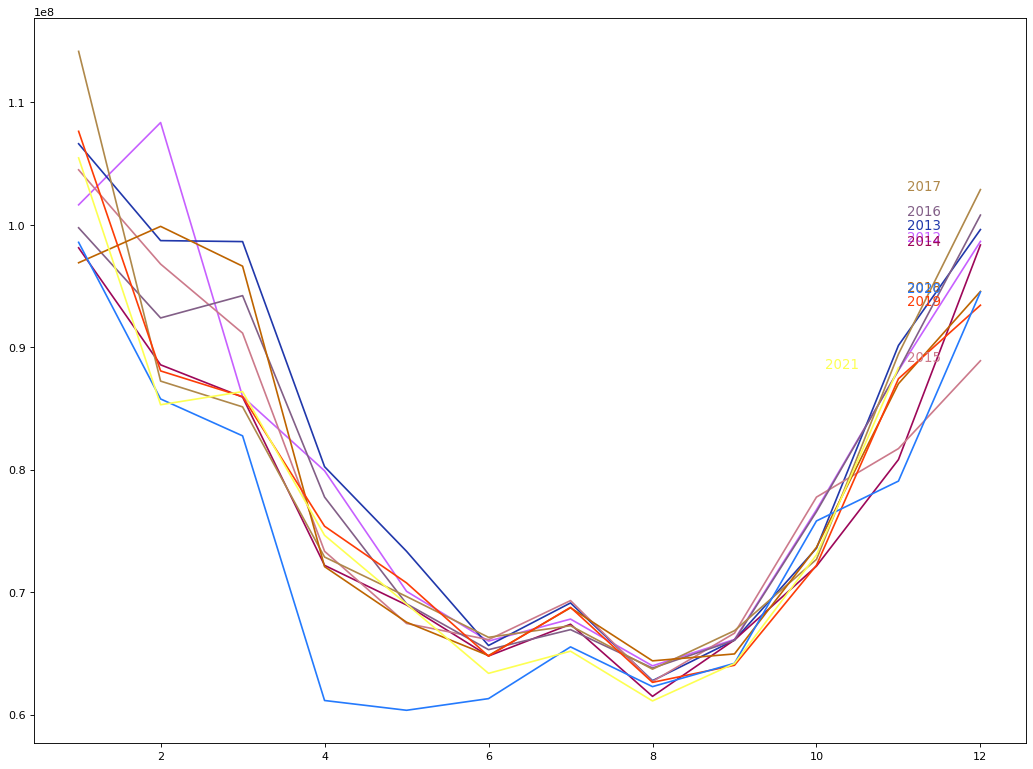

In [14]:
import matplotlib as mpl
dftm.reset_index(inplace=True)
dftm['year'] = pd.DatetimeIndex(dftm['Date - Heure']).year  
dftm['month'] = pd.DatetimeIndex(dftm['Date - Heure']).month  

#dftd['MonthDay'] = dftd['Date - Heure'].apply(lambda x:x.strftime('%m%d'))
years = dftd['year'].unique()

dftm = dftm.sort_values(by='Date - Heure')

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Consommation brute électricité (MW) - RTE', data=dftm.loc[dftm.year==y, :], color=mycolors[i], label=y)
        plt.text(dftm.loc[dftm.year==y, :].shape[0]-.9, dftm.loc[dftm.year==y, 'Consommation brute électricité (MW) - RTE'][-1:].values[0], y, fontsize=12, color=mycolors[i])




Commenter les figures

Doit-on transformer les données ?


$\bullet$ Affichage des corrélations des séries annuel, mensuel et journalières (2 intervalles sont considérés). 

- attention le calcul de coeffcients de corrélation sur la série d'origine peut prendre beaucoups de temps

- les indices de corrélation ne sont pas temporelles, n'oubliez pas de multiplier par le pas d'échantillonnage

$\bullet$ Commenter les corrélations ainsi obtenues
(cf. les courbes ci-dessous)

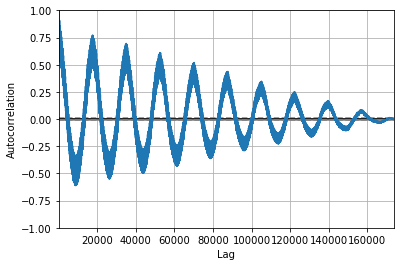

In [15]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dftr[['Consommation brute électricité (MW) - RTE']])

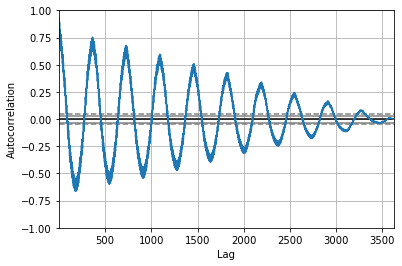

In [16]:
autocorrelation_plot(dftd[['Consommation brute électricité (MW) - RTE']])

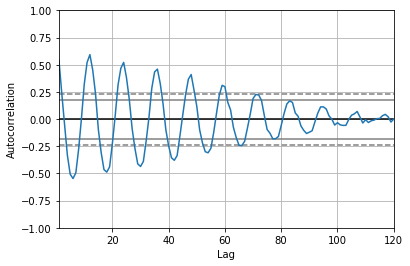

In [17]:
autocorrelation_plot(dftm[['Consommation brute électricité (MW) - RTE']])

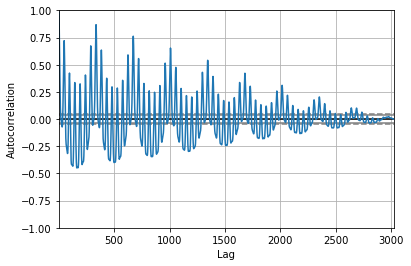

In [18]:
autocorrelation_plot(dftr[7104:10128][['Consommation brute électricité (MW) - RTE']])

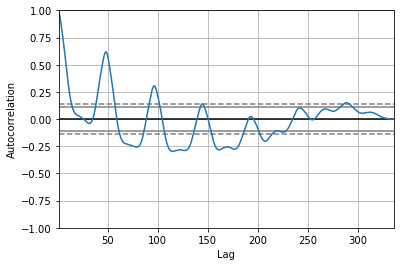

In [19]:
autocorrelation_plot(dftr[7104:7440][['Consommation brute électricité (MW) - RTE']])

# Modèlisation de la série mensuelle


$\bullet$ Affichage de la série mensuel où la tendance est supprimée

(utilisation de la fonction detrend de scipy)

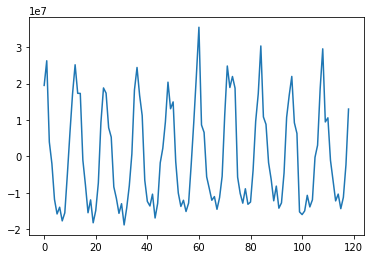

In [20]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(dftm[1:]['Consommation brute électricité (MW) - RTE'].values)
#plt.plot() # a completer et a analyser

plt.plot(detrended)

$\bullet$ Utilisation de la fonction "seasonal_decompose" de statsmodels pour décomposer la série selon la composante tendance, saisonnalité et perturbation.

Utilisation d'un modèle additif, faire varier les paramètres


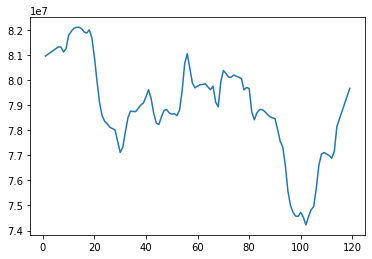

In [21]:

# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose


result_mul1 = seasonal_decompose(dftm[1:]['Consommation brute électricité (MW) - RTE'], model='additive', period=12, extrapolate_trend='freq')

# Afficher le résultat
#detrended = dftm[1:]['Consommation brute électricité (MW) - RTE'].values - result_mul.trend
#plt.plot(result_mul.trend)
detrended = dftm[1:]['Consommation brute électricité (MW) - RTE'].values - result_mul1.trend
plt.plot(result_mul1.trend)

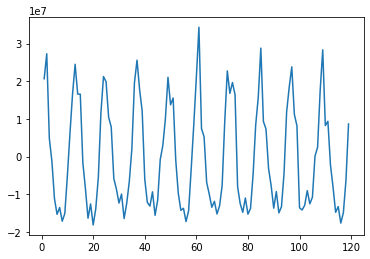

In [22]:
plt.plot(detrended)

$\bullet$ Modélisation de la tendance par un polynome

Slope 1.9851367454493013e-12
NRMSE: [559919.30786038]
A    float64
dtype: object


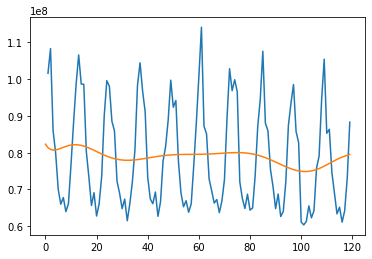

In [23]:
#coefficients, residuals, _, _, _ = np.polyfit( à compléter)
coefficients, residuals, _, _, _ = np.polyfit(np.arange(1,120),np.array(result_mul1.trend),11, full = True)
mse = residuals/len(np.arange(1,120))
nrmse = np.sqrt(mse)
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

plt.plot(dftm[1:]['Consommation brute électricité (MW) - RTE'])

# dessiner la droite, donner la valeur pour chaque valeur de l'index (dans res)
res = np.polyval(coefficients,np.arange(0,120))
dfr = pd.DataFrame(res,index = dftm.index,columns=['A'])
print(dfr.dtypes)

plt.plot(dftm.index,res)
plt.show()

$\bullet$ Soustraire la tendance

$\bullet$ Calcul d'une saison moyenne sur 12 mois qui soit de moyenne nulle (modifier la tendance)

$\bullet$ Etude du signal résultant (bruit/perturbation)

                 Date - Heure  Consommation brute électricité (MW) - RTE  \
0   2011-12-31 00:00:00+00:00                                     117924   
1   2012-01-31 00:00:00+00:00                                  101611980   
2   2012-02-29 00:00:00+00:00                                  108330078   
3   2012-03-31 00:00:00+00:00                                   85961478   
4   2012-04-30 00:00:00+00:00                                   79898947   
..                        ...                                        ...   
115 2021-07-31 00:00:00+00:00                                   65175968   
116 2021-08-31 00:00:00+00:00                                   61112876   
117 2021-09-30 00:00:00+00:00                                   64166936   
118 2021-10-31 00:00:00+00:00                                   73035153   
119 2021-11-30 00:00:00+00:00                                   88319045   

     year  month             E  
0    2011     12 -8.219589e+07  
1    2012      1  2.0

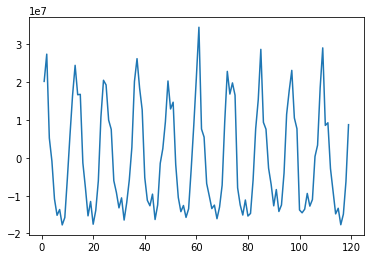

In [24]:
dftm = dftm.assign(E=dftm['Consommation brute électricité (MW) - RTE']-dfr['A'])

#E=dftm['Consommation brute électricité (MW) - RTE']-dfr['A']
#print(dftm)
E=dftm['Consommation brute électricité (MW) - RTE']-dfr['A']
print(dftm)

#for x in range(len(dftm)):
    #print(x)
   # print(dftm[x]['Consommation brute électricité (MW) - RTE'])
   # res1 = dftm[x]['Consommation brute électricité (MW) - RTE'].values - coefficients[0]*x - coefficients[1]
plt.plot(dftm[1:].index,dftm[1:]['E'])
plt.show()

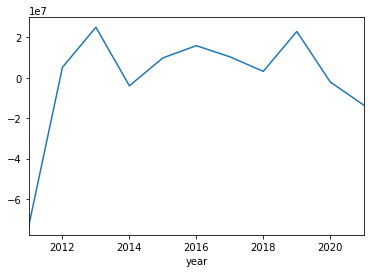

In [25]:
s = dftm.groupby('year').sum()
s = s['E']-s['E'].mean()
s.plot()

$\bullet$ Etude du bruit (correlation, histogramme)

- Est-ce que le bruit est blanc ?

- Est-il gaussien ?

- Est-ce que ce modèle est suffisant ?




In [26]:
!pip install seaborn

<function matplotlib.pyplot.show(*args, **kw)>

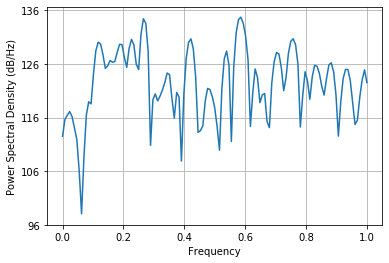

In [27]:
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
bruit = result_mul1.observed-result_mul1.seasonal-result_mul1.trend
plt.psd(bruit)
plt.show

In [76]:
k2,p = normaltest(bruit)
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Le bruit n'est pas gaussien ")
else:
    print("Le bruit est gaussien")

Le bruit est gaussien


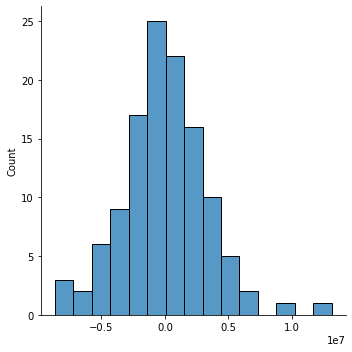

In [35]:
sns.displot(bruit)

La distribution de ce bruit correspond à gaussien.

- Tester la stationnarité du bruit 

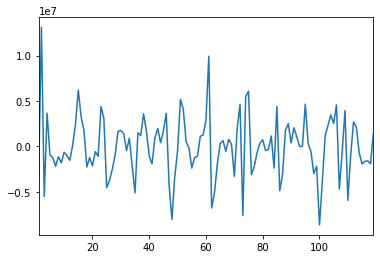

In [53]:
bruit.plot()

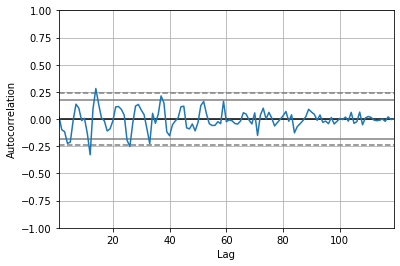

In [93]:
autocorrelation_plot(bruit)

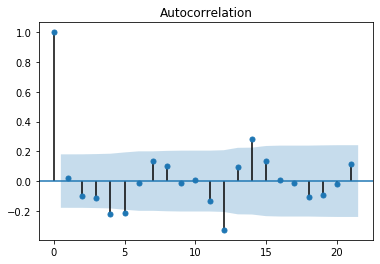

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(bruit)
plt.show()